# Lab 8: Define and Solve an ML Problem of Your Choosing
## I initially collaborated with Ira Samant. We seperately worked on our notebooks and shared ideas. After the basic model was done I developed my model further and added an addition model + performed model evaluation by myself. 

In [64]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [65]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)
df.head()


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [66]:
df.shape

(1562, 19)

In [67]:
df.isna().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [68]:
df.drop(columns=[
    "GINI index (World Bank estimate)", 
    "gini of household income reported in Gallup, by wp5-year"
], inplace=True)


In [69]:
df.dropna(inplace=True)

# Check the shape or preview cleaned data
print(df.shape)
df.head()

(1120, 17)


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15"
10,Albania,2007,4.634252,9.077325,0.821372,66.576630,0.528605,-0.016183,0.874700,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325
14,Albania,2012,5.510124,9.246649,0.784502,68.028885,0.601512,-0.174559,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.30325
15,Albania,2013,4.550648,9.258439,0.759477,68.291374,0.631830,-0.132977,0.862905,0.633609,0.338379,0.338095,0.070411,-0.330956,2.315580,0.508846,0.30325
16,Albania,2014,4.813763,9.278097,0.625587,68.512100,0.734648,-0.030553,0.882704,0.684911,0.334543,0.498786,0.314873,-0.187407,2.660069,0.552597,0.30325
17,Albania,2015,4.606651,9.303031,0.639356,68.691956,0.703851,-0.086883,0.884793,0.688370,0.350427,0.506978,0.251629,-0.152544,2.729001,0.592405,0.30325


In [70]:
df.isna().sum()

country                                              0
year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI index (World Bank estimate), average 2000-15    0
dtype: int64

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. **List the data set you have chosen.** 
2. **What will you be predicting? What is the label?** 
3. **Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?** 
4. **What are your features? (note: this list may change after your explore your data).** 
5. **Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?** 

1. I chose the World Happiness Report (WHR) 2018 dataset.
2. I will be predicting "Life Ladder", which is a measure of well- being and life satisfaction in each country and year from 2008 to 2018.
3. Because all the data is labeled, this is a supervised learning problem. This is a regression problem because the label Life Ladder is a continuous numerical score. It's neither a binary or multiclassification.
4. Log GDP per capita, Healthy life expectancy at birth, Delivery Quality, Social support, Democratic Quality, Positive affect, Freedom to make life choices, Generosity, Confidence in national government, Standard deviation of ladder by country-year. GINI index (World Bank estimate), average 2000-1, Negative affect, Perceptions of corruption, Standard deviation/Mean of ladder by country-year
5. Determining the happiness and life satisfaction score for each country allows you to see if you would consider building a future or moving into that country. Countries and corporations can use this score to help determine if they want to make investments into other countries, and also use this score to distribute aid and opportunities to people in need. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [71]:
#Data Visualization. 

In [72]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
              year  Life Ladder  Log GDP per capita  Social support  \
count  1120.000000  1120.000000         1120.000000     1120.000000   
mean   2011.457143     5.398692            9.127888        0.810227   
std       3.093991     1.142460            1.175799        0.121470   
min    2005.000000     2.693061            6.377396        0.290184   
25%    2009.000000     4.553355            8.184690        0.747562   
50%    2012.000000     5.256277            9.335917        0.834756   
75%    2014.000000     6.210087           10.067779        0.905094   
max    2016.000000     7.970892           11.459155        0.984940   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1120.000000                   1120.000000   
mean                          61.664649                      0.720369   
std                            8.313014                      0.141711   
min                           37.766476         

In [73]:
print(df.dtypes)

country                                               object
year                                                   int64
Life Ladder                                          float64
Log GDP per capita                                   float64
Social support                                       float64
Healthy life expectancy at birth                     float64
Freedom to make life choices                         float64
Generosity                                           float64
Perceptions of corruption                            float64
Positive affect                                      float64
Negative affect                                      float64
Confidence in national government                    float64
Democratic Quality                                   float64
Delivery Quality                                     float64
Standard deviation of ladder by country-year         float64
Standard deviation/Mean of ladder by country-year    float64
GINI index (World Bank e

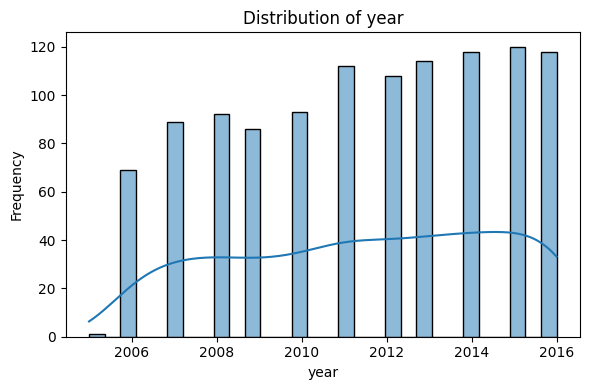

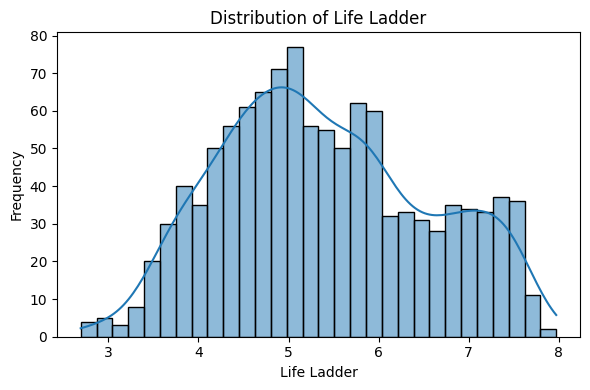

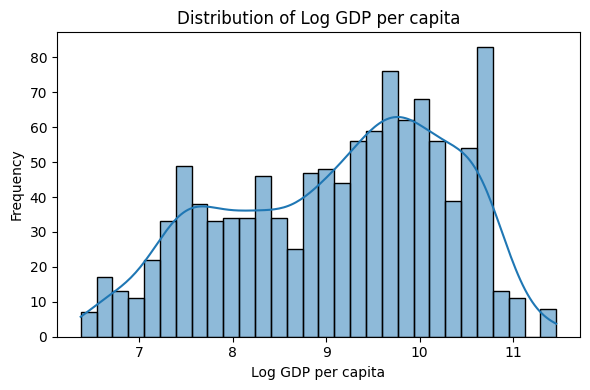

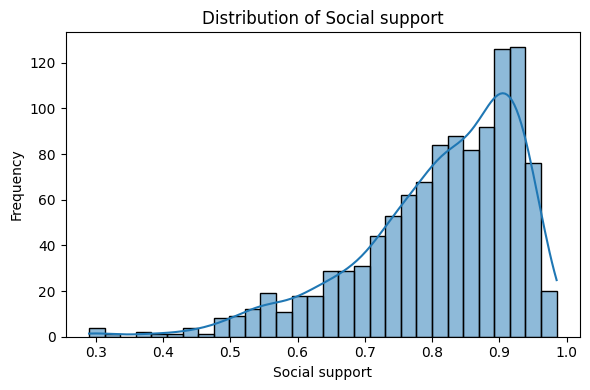

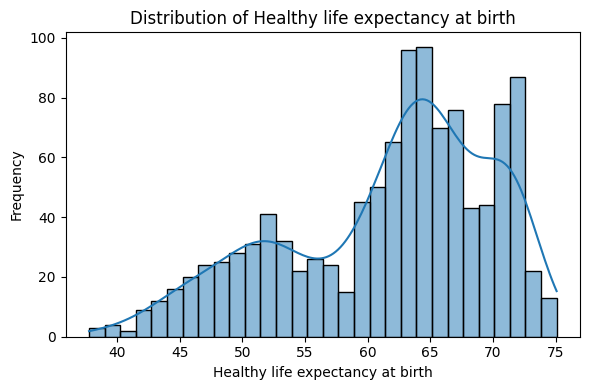

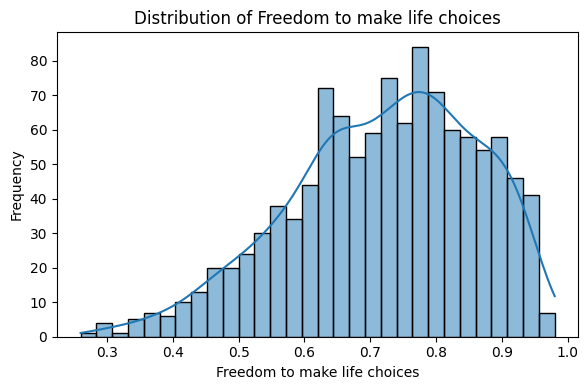

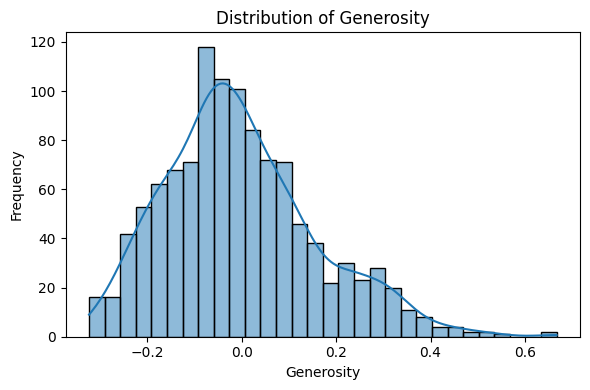

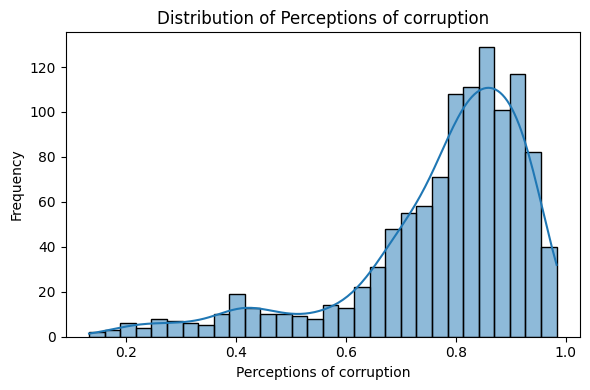

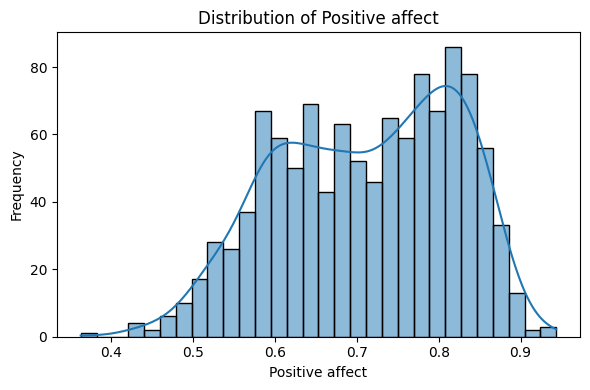

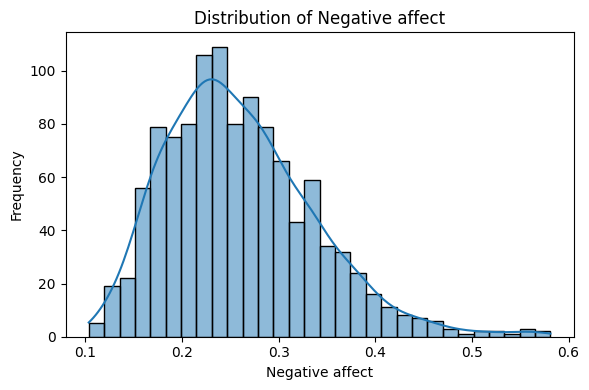

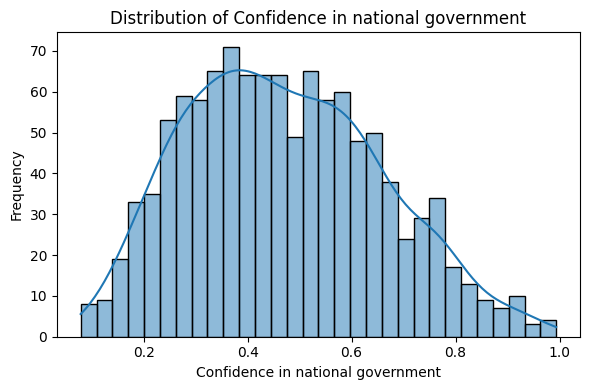

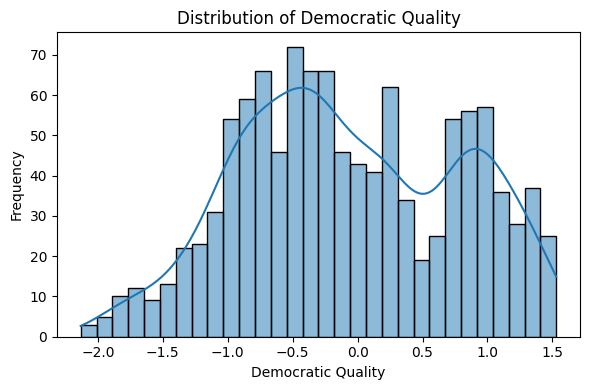

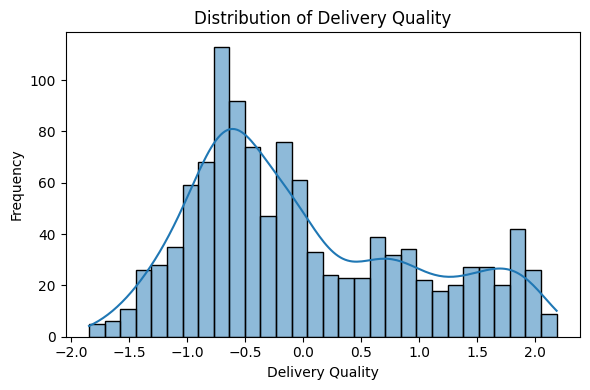

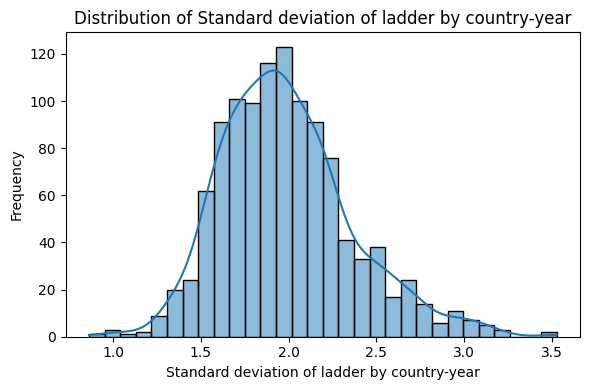

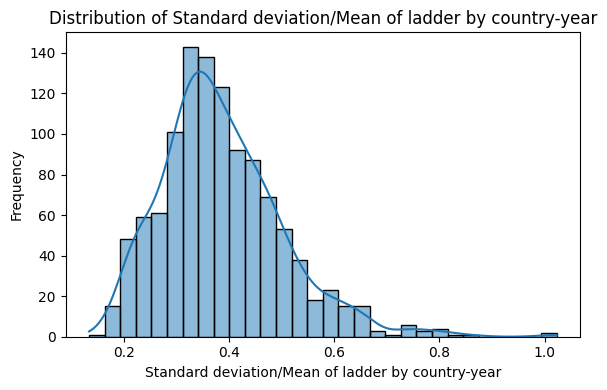

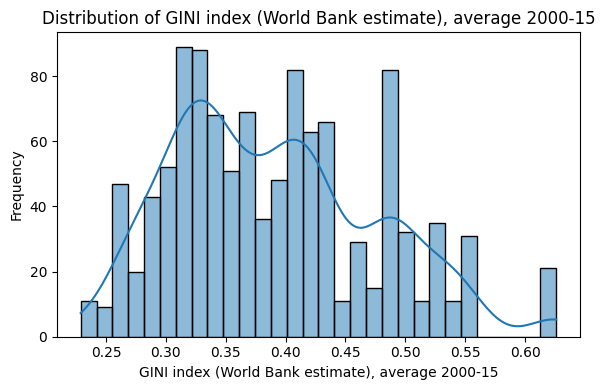

In [74]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

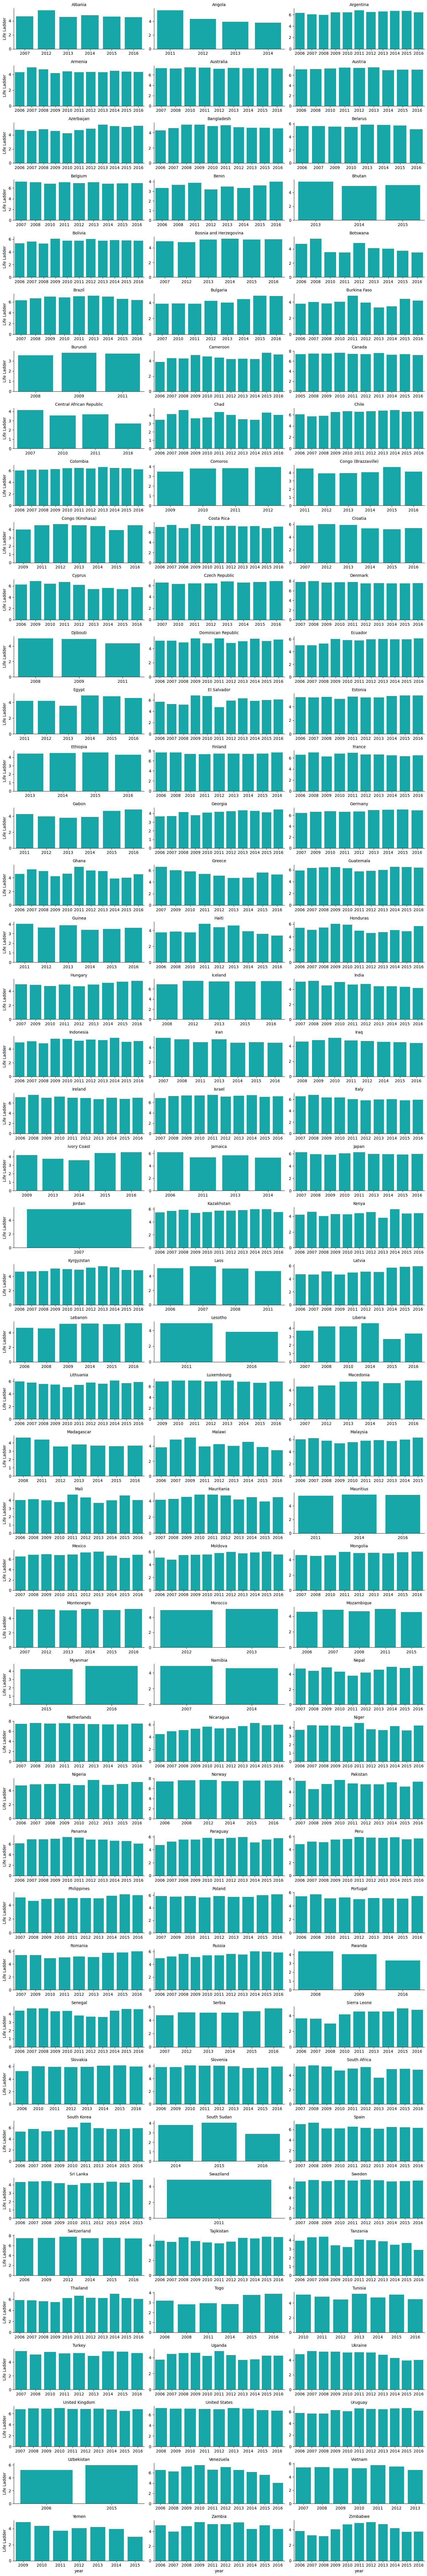

In [75]:
plot = sns.catplot(x = 'year', y= 'Life Ladder', col='country', col_wrap=3, data=df, kind="bar", height=2.0, aspect=2.5, color='c', sharex=False, sharey=False)
plot.set_titles("{col_name}")
plot

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

1. **Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?**
2. **Explain different data preparation techniques that you will use to prepare your data for modeling.**
3. **What is your model (or models)?**
4. **Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.**

1) Yes, the new feature list is contains the columns: Log GDP per capita, Healthy life expectancy at birth, Delivery Quality, Social support, Democratic Quality, Positive affect, Freedom to make life choices, Generosity, Confidence in national government, Standard deviation of ladder by country-year. GINI index (World Bank estimate), average 2000-1, Negative affect, Perceptions of corruption, Standard deviation/Mean of ladder by country-year.
2) I dropped the 2 columns with high NaN values, and also dropped the rows from other columns that had NaN values. This brought our dataset down to 1120 rows and 17 columns. This also helped prepare my dataset for modeling as there are no NaN values in my dataset.
3) I am using a linear regression model for this dataset, because it's the appropriate model to calculate the Life Ladder score which is a continuous value. I may also use a Random Forest Regressor to evaluate the non-linear relationships and interactions between features.
4) I split the dataset in a 80-20 split and trained a linear regression model. The initial R^2 score was 0.9326 and MAE was 0.1949. After analylzing the relationship and correlation between the features and label through a heatmap, And selected the features based on high correlation with the Label, and removed features with high multicollinearity. This slightly reduced my R^2 to 0.9320 but also reduced my MAE to 0.1937. After this, I trained a random forest regression model, which I believe was a better at generalizing the dataset, with an R^2 value of 0.9639 and MAE of 0.1433. I then used GridSearchCV to tune hyperparameters . After tuning, the optimized Random Forest model achieved an better R^2 of 0.9641, which shows improved predictive performance.This process helped me build a model that generalizes well and makes more accurate predictions.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [76]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [77]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
life_ladder_corr = correlation['Life Ladder'].sort_values(ascending=False)

print(life_ladder_corr)


Life Ladder                                          1.000000
Log GDP per capita                                   0.778659
Healthy life expectancy at birth                     0.750038
Delivery Quality                                     0.722175
Social support                                       0.686535
Democratic Quality                                   0.626150
Positive affect                                      0.571141
Freedom to make life choices                         0.541789
Generosity                                           0.226619
year                                                 0.010493
Confidence in national government                   -0.100633
Standard deviation of ladder by country-year        -0.109855
GINI index (World Bank estimate), average 2000-15   -0.162708
Negative affect                                     -0.215237
Perceptions of corruption                           -0.463530
Standard deviation/Mean of ladder by country-year   -0.747212
Name: Li

In [78]:


X = df[[
    "Log GDP per capita",
    "Healthy life expectancy at birth",
    "Delivery Quality",
    "Social support",
    "Democratic Quality",
    "Positive affect",
    "Freedom to make life choices",
    "Generosity",
    "Confidence in national government",
    "Standard deviation of ladder by country-year",
    "GINI index (World Bank estimate), average 2000-15",
    "Negative affect",
    "Perceptions of corruption",
    "Standard deviation/Mean of ladder by country-year"
]]
y = df["Life Ladder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")


R² Score: 0.9326
Mean Absolute Error: 0.1949


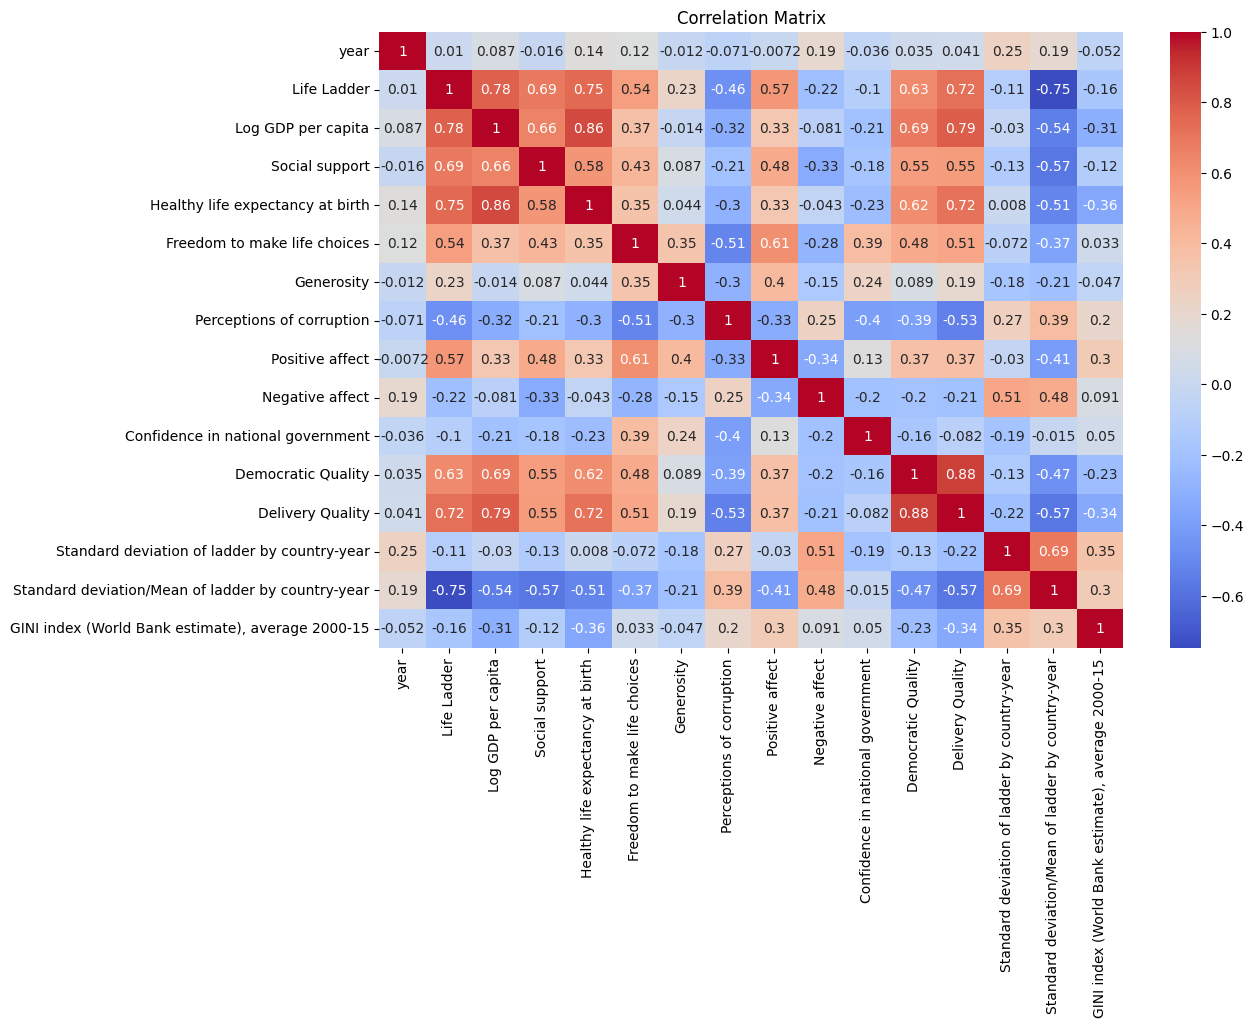

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

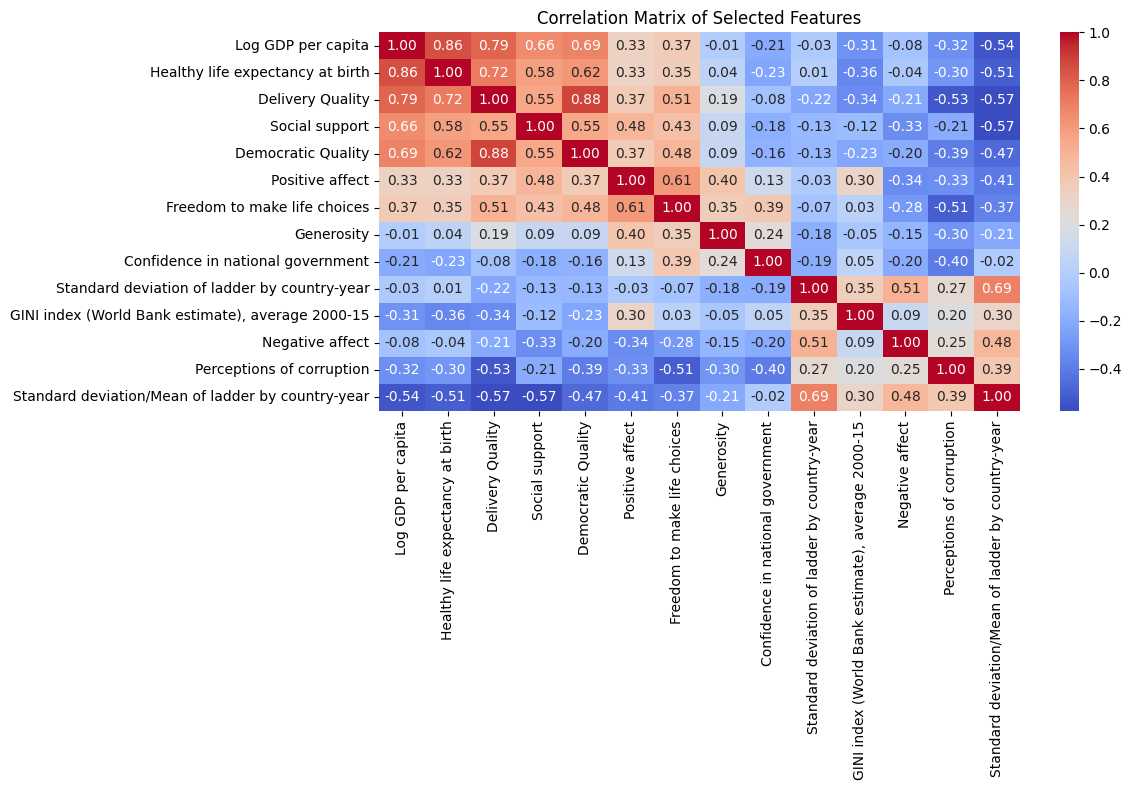

In [83]:
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()

In [84]:
#improving model performance through feature selection. 
X = df[[
    "Log GDP per capita", 
    "Delivery Quality",
    "Social support",
    "Positive affect",
    "Freedom to make life choices",
    "Generosity",
    "Standard deviation of ladder by country-year",
    "Negative affect",
    "Perceptions of corruption",
    "Standard deviation/Mean of ladder by country-year"
]]
y = df["Life Ladder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)

In [87]:
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")


R² Score: 0.9320
Mean Absolute Error: 0.1937


In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R² on test set:", ridge_grid.best_estimator_.score(X_test, y_test))


Best Ridge alpha: {'alpha': 0.01}
Best Ridge R² on test set: 0.9321360031010633


In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_rf_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, y_rf_pred))


Random Forest R²: 0.9639469407615837
Random Forest MAE: 0.14330183705205338


In [90]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest parameters:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_
print("Best RF R² on test set:", best_rf.score(X_test, y_test))


Best Random Forest parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF R² on test set: 0.9649971915453509
